# Modeling Graph

In [1]:
import networkx as nx
import pandas as pd
df = pd.read_csv("after-concepts.csv")

In [2]:
# Take only the first 200 rows and select specific columns
df = df.head(200)

In [3]:
df

,Number,Title,Description,Described In,Definition,sentence,kw_bert,Figures,synonyms,SynonymsKW,Subject,Relation,Object
0,11.2,Identify Risks,the process of identify individual project ris...,NaN,the process of identify individual project ris...,['the process of identify individual project r...,"['project risk', 'project risk document', 'pro...",PMBOOKimgs/figureNone.png,"['project risk', 'project risk common', 'proje...",[-1.00361414e-01 3.35380197e-01 1.59030974e-...,process,identify,individual project risk source
1,11.3,Perform Qualitative Risk Analysis,the process of prioritize individual project r...,NaN,the process of prioritize individual project r...,['the process of prioritize individual project...,"['project risk analysisor', 'project risk', 'i...",PMBOOKimgs/figureNone.png,NaN,[ 1.08589485e-01 3.29151183e-01 1.84150457e-...,process,prioritize,individual project risk
2,11.4,Perform Quantitative Risk Analysis,the process ofnumerically analyze the combine ...,NaN,the process ofnumerically analyze the combine ...,['the process ofnumerically analyze the combin...,"['identifiedindividual project risk', 'project...",PMBOOKimgs/figureNone.png,NaN,[-1.68618545e-01 3.41307163e-01 2.08855078e-...,process analyze,combine,effect
3,11.7,Monitor Risks,the process of monitor the implementation of a...,NaN,the process of monitor the implementation of a...,['the process of monitor the implementation of...,"['project risk process', 'project risk managem...",PMBOOKimgs/figurePMBOOKimgs/figure11-1.png.png,"['project risk management', 'project riskmanag...",[ 4.86373492e-02 3.42356235e-01 1.86675921e-...,they,overlap,interact way thatcannot
4,11.7,Monitor Risks,the process of monitor the implementation of a...,NaN,the process of monitor the implementation of a...,['the process of monitor the implementation of...,"['project risk process', 'project risk managem...",PMBOOKimgs/figurePMBOOKimgs/figure11-1.png.png,"['project risk management', 'project riskmanag...",[ 4.86373492e-02 3.42356235e-01 1.86675921e-...,pmboke guide.395ctionepifonotkey concept proje...,be,risky they
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,11.2.2.2,DATA GATHERING,datagathering technique that can be use for th...,NaN,datagathering technique that can be use for th...,['datagathering technique that can be use for ...,"['risk identify brainstorming', 'project risk ...",PMBOOKimgs/figureNone.png,NaN,[-5.22296950e-02 2.35731170e-01 2.94230163e-...,it,be,impossible build exhaustive
196,11.2.2.2,DATA GATHERING,datagathering technique that can be use for th...,NaN,datagathering technique that can be use for th...,['datagathering technique that can be use for ...,"['risk identify brainstorming', 'project risk ...",PMBOOKimgs/figureNone.png,NaN,[-5.22296950e-02 2.35731170e-01 2.94230163e-...,care,should be take ensure,checklist
197,11.2.2.2,DATA GATHERING,datagathering technique that can be use for th...,NaN,datagathering technique that can be use for th...,['datagathering technique that can be use for ...,"['risk identify brainstorming', 'project risk ...",PMBOOKimgs/figureNone.png,NaN,[-5.22296950e-02 2.35731170e-01 2.94230163e-...,project team,should explore,item
198,11.2.2.2,DATA GATHERING,datagathering technique that can be use for th...,NaN,datagathering technique that can be use for th...,['datagathering technique that can be use for ...,"['risk identify brainstorming', 'project risk ...",PMBOOKimgs/figureNone.png,NaN,[-5.22296950e-02 2.35731170e-01 2.94230163e-...,checklist,should be,review time time


# NX

In [153]:
# Create a bidirectional graph from the subset of the DataFrame
G = nx.from_pandas_edgelist(df, 'Subject', 'Object', edge_attr=['kw_bert', 'synonyms'], create_using=nx.DiGraph())


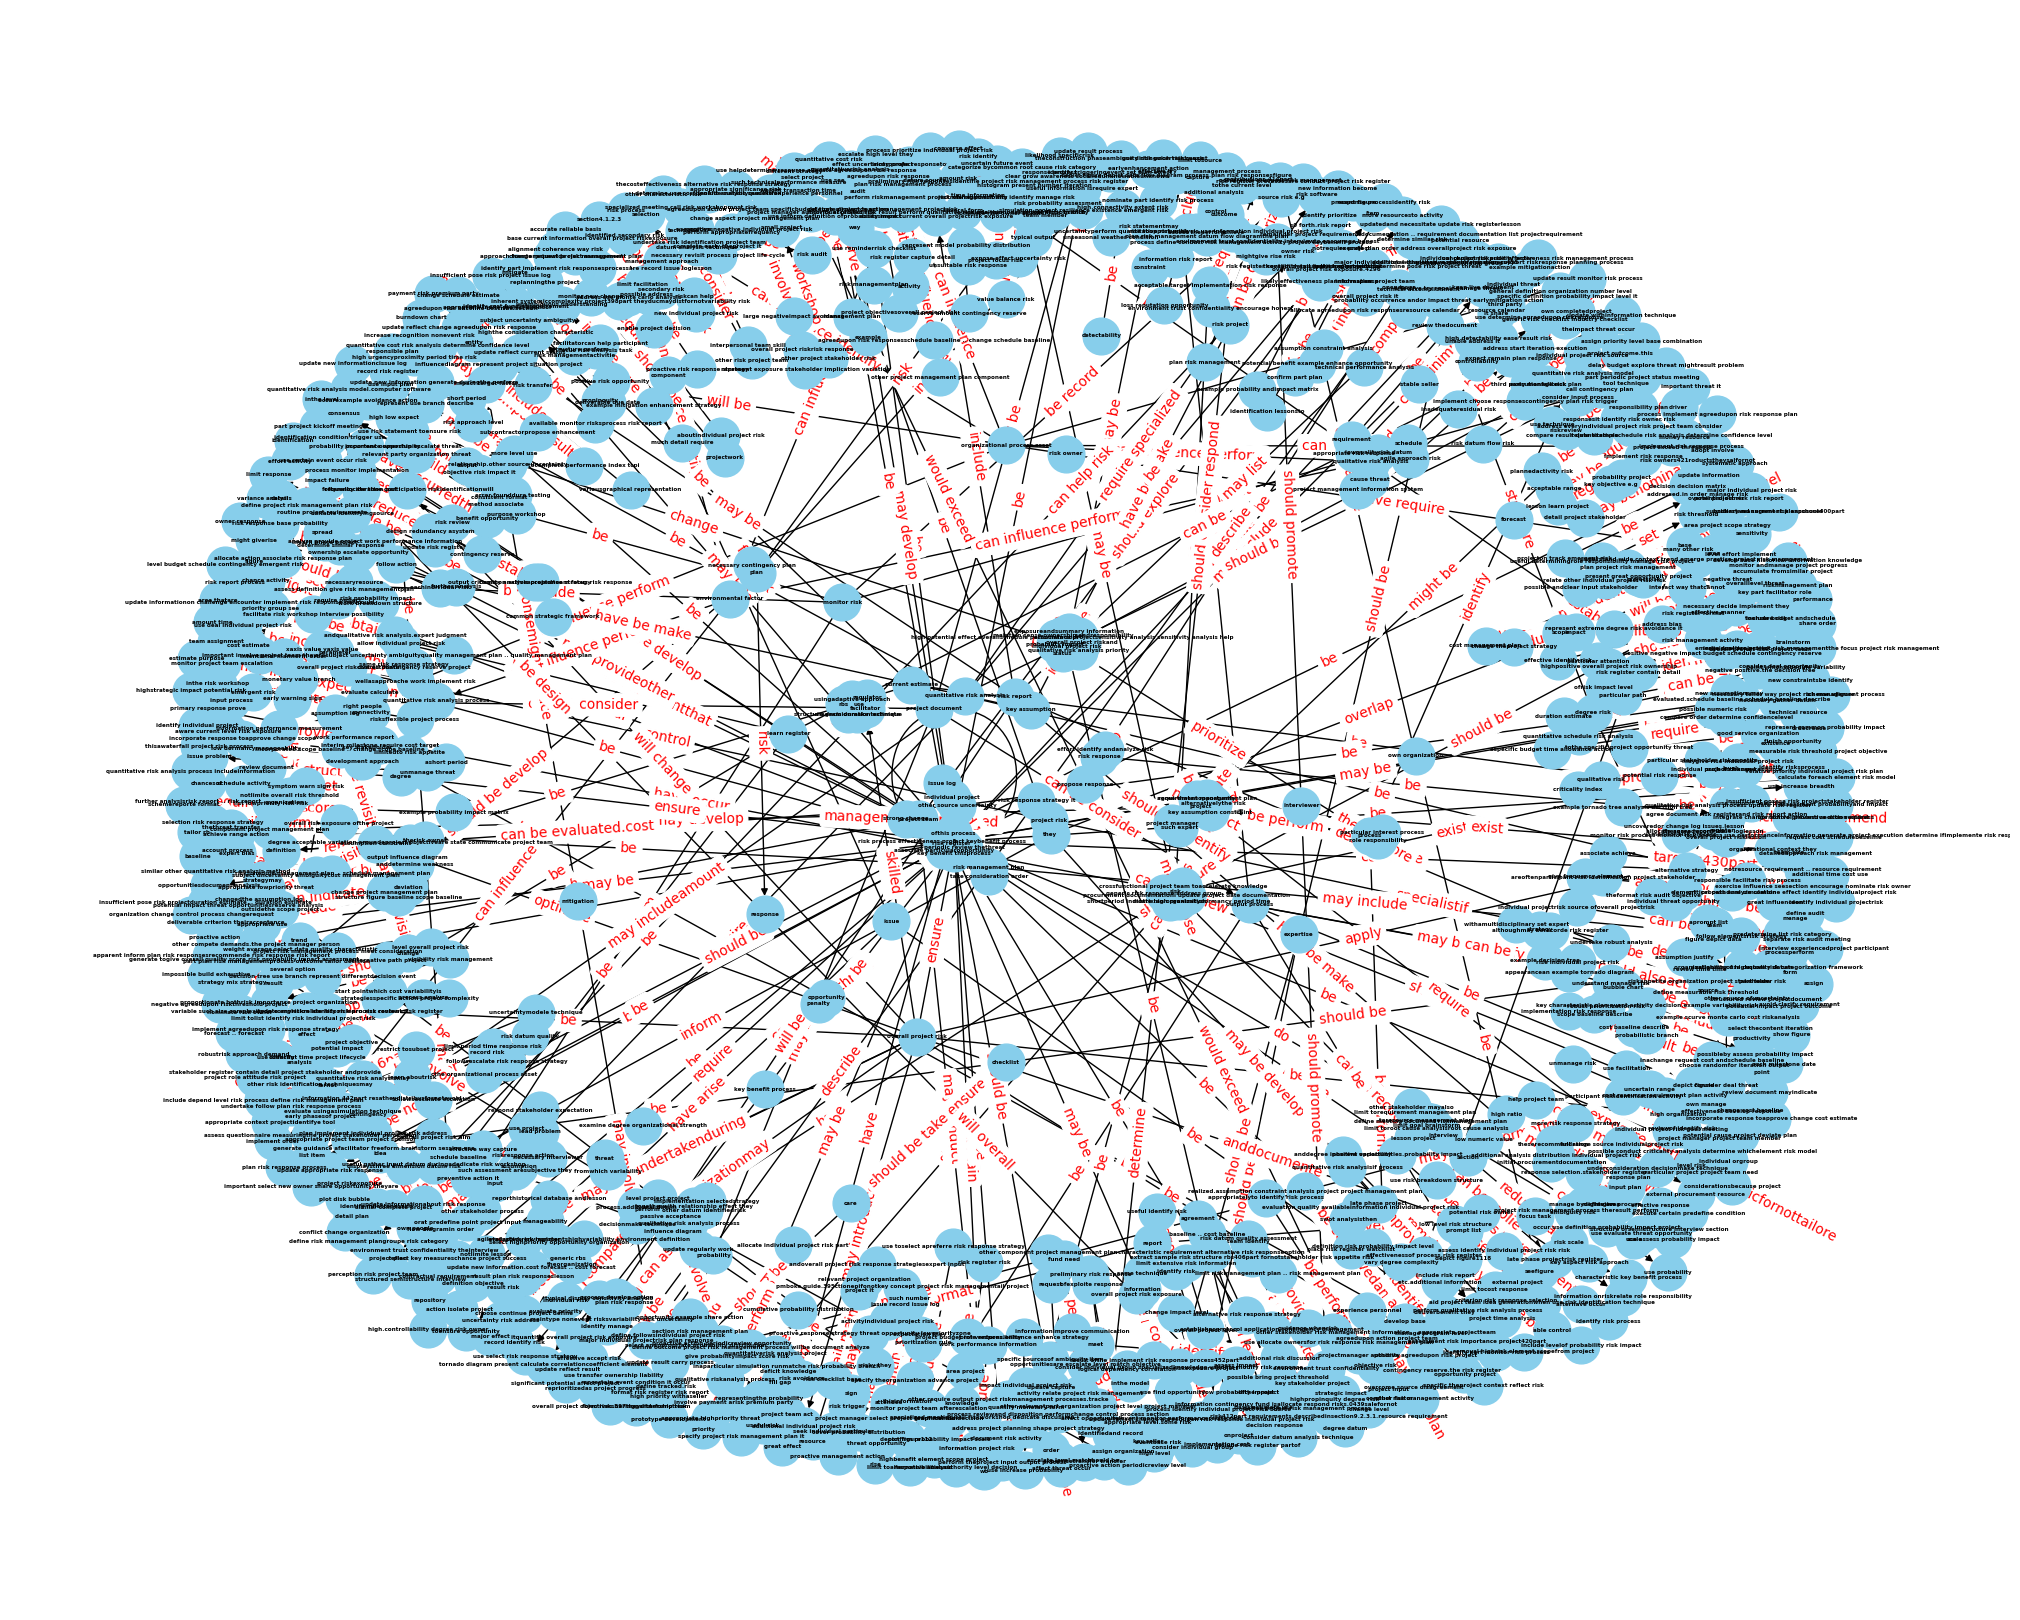

In [154]:
# Visualization (optional)
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G)  # or choose another layout
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=4)

# Draw edge labels from the "Relation" column
edge_labels = {}
for source, target in G.edges():
    matching_rows = df[(df['Subject'] == source) & (df['Object'] == target)]
    if not matching_rows.empty:
        edge_labels[(source, target)] = matching_rows['Relation'].iloc[0]

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the plot
plt.show()

# DGL and nx representation (numerical)

In [10]:
import torch


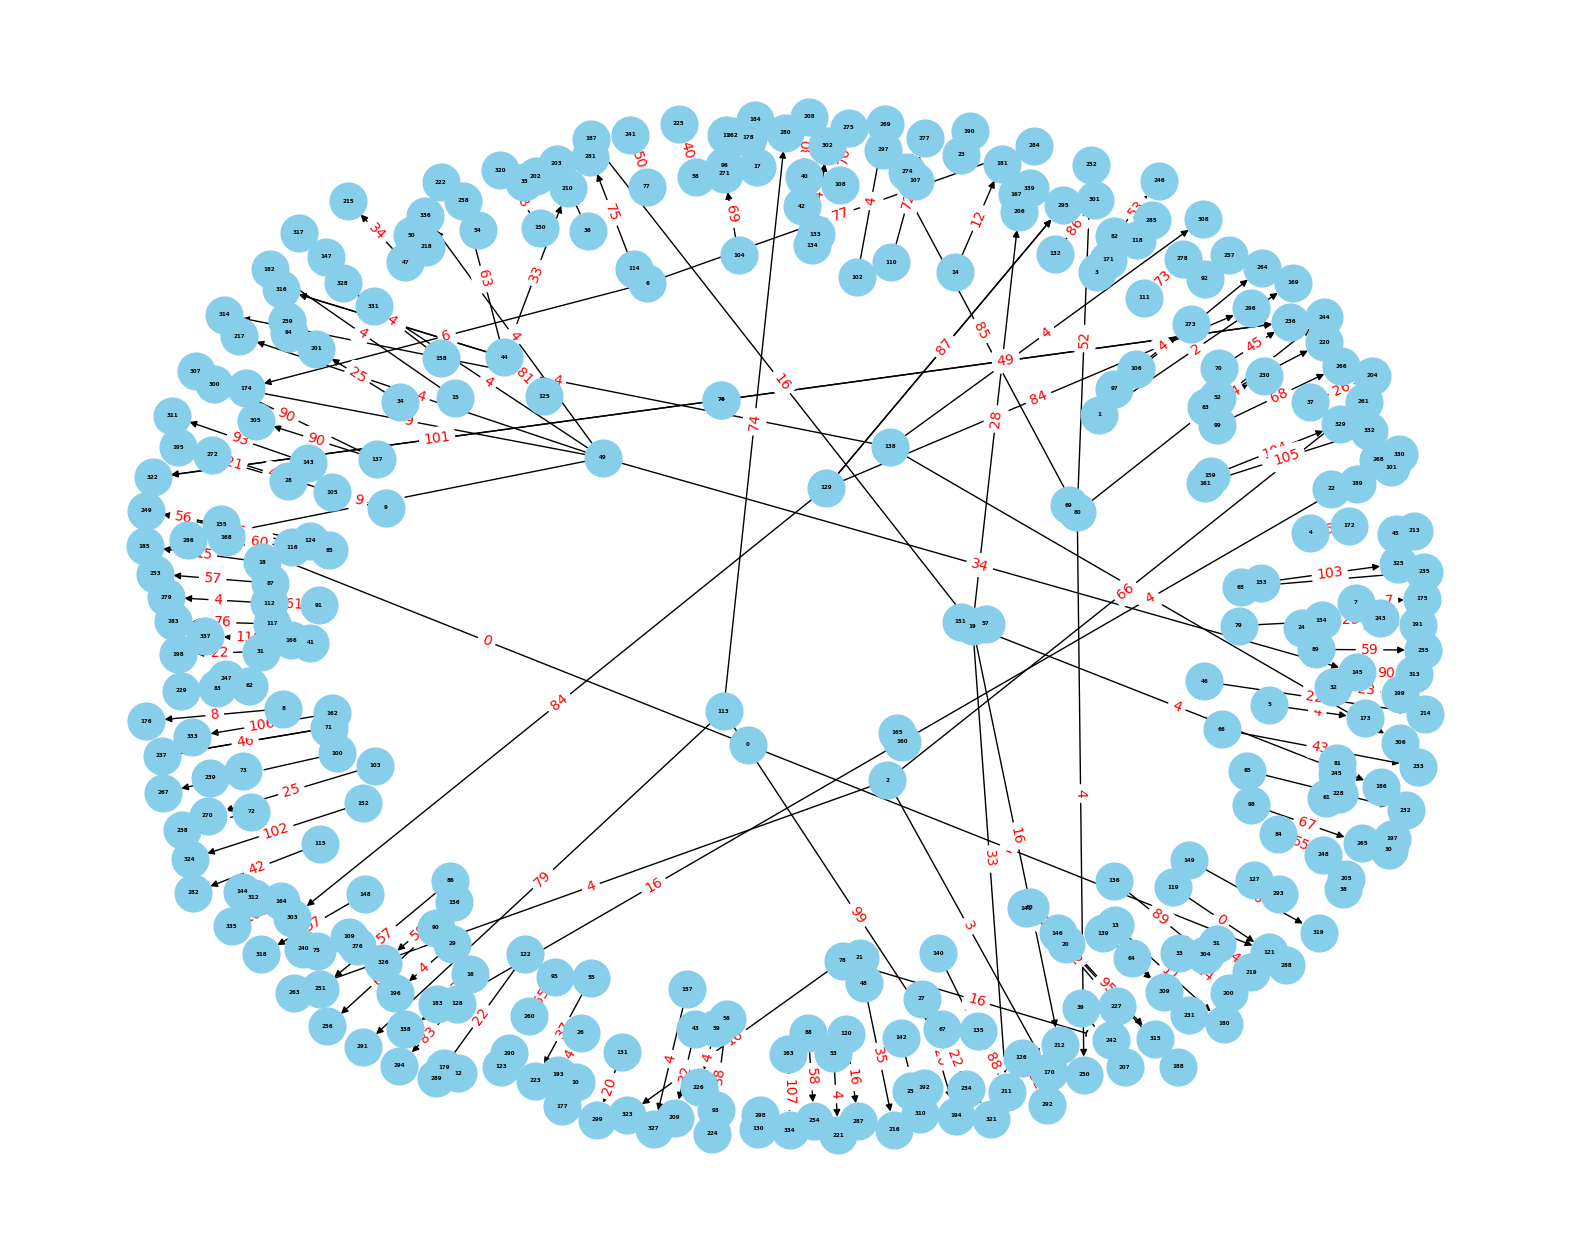

In [11]:
import dgl
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create a DGL graph from the "Subject," "Object," and "Relation" columns
G = dgl.DGLGraph()

# Extract the unique nodes from "Subject" and "Object" columns
nodes = pd.concat([df['Subject'], df['Object']]).unique()
node_dict = {node: i for i, node in enumerate(nodes)}  # Create a mapping from node name to index

# Add nodes to the graph
G.add_nodes(len(nodes))

# Map relations to numerical values
relations = df['Relation'].unique()
relation_dict = {rel: i for i, rel in enumerate(relations)}  # Map relation strings to numerical values

# Extract the edges and the corresponding relation
src = df['Subject'].apply(lambda x: node_dict[x]).tolist()
dst = df['Object'].apply(lambda x: node_dict[x]).tolist()
rel_types = df['Relation'].apply(lambda x: relation_dict[x]).tolist()  # Map relation strings to numerical values

# Add edges with relation types to the graph
G.add_edges(src, dst, data={'etype': torch.tensor(rel_types, dtype=torch.int64)})

# Visualization (optional)
fig, ax = plt.subplots(figsize=(20, 16))  # Create a new figure and axis

# Create a NetworkX graph for visualization
nx_G = G.to_networkx()
pos_layout = nx.spring_layout(nx_G)

# Draw nodes
nx.draw(nx_G, pos_layout, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=4, ax=ax)

# Draw edge labels with numerical relation types
edge_labels = {(src[i], dst[i]): rel_types[i] for i in range(len(src))}
nx.draw_networkx_edge_labels(nx_G, pos_layout, edge_labels=edge_labels, font_color='red', ax=ax)

# Show the plot
plt.show()


# DGL and nx representation (words)

In [ ]:
import dgl
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame named 'df' with 'Subject', 'Object', and 'Relation' columns

# Create a DGL graph from the "Subject," "Object," and "Relation" columns
G = dgl.DGLGraph()

# Extract the unique nodes from "Subject" and "Object" columns
nodes = pd.concat([df['Subject'], df['Object']]).unique()
node_dict = {node: i for i, node in enumerate(nodes)}  # Create a mapping from node name to index

# Add nodes to the graph
G.add_nodes(len(nodes))

# Extract the edges and the corresponding relation
src = df['Subject'].apply(lambda x: node_dict[x]).tolist()
dst = df['Object'].apply(lambda x: node_dict[x]).tolist()
relations = df['Relation'].tolist()

G.add_edges(src, dst)

# Visualization (optional)
fig, ax = plt.subplots(figsize=(20, 16))  # Create a new figure and axis

# Create a NetworkX graph for visualization
nx_G = G.to_networkx()

# Map node indices to node names
node_labels = {i: node for node, i in node_dict.items()}

# Draw nodes with labels using the node names
nx.draw(nx_G, pos_layout, labels=node_labels, font_weight='bold', node_size=700, node_color='skyblue', font_size=4, ax=ax)  # Pass the 'ax' parameter

# Draw edge labels from the "Relation" column
edge_labels = {(src[i], dst[i]): relations[i] for i in range(len(src))}
nx.draw_networkx_edge_labels(nx_G, pos_layout, edge_labels=edge_labels, font_color='red', ax=ax)  # Pass the 'ax' parameter

# Show the plot
plt.show()


# Visualize nodes

In [149]:
# Print node keys
print("Node dict keys: \n{}\n".format(G.nodes.data()))

# Print number of nodes
print("Number of nodes: \n{}\n".format(G.number_of_nodes()))

# Print number of edges
print("Number of edges: \n{}".format(G.number_of_edges()))


Node dict keys: 
[('process', {}), ('individual project risk source', {}), ('individual project risk', {}), ('process analyze', {}), ('effect', {}), ('they', {}), ('interact way thatcannot', {}), ('pmboke guide.395ctionepifonotkey concept project risk managementail project', {}), ('risky they', {}), ('vary degree complexity', {}), ('deliverbenefit they', {}), ('respond stakeholder expectation', {}), ('conflict change organization', {}), ('project risk', {}), ('intentional mannerin order', {}), ('value balance risk', {}), ('risk management aim identify manage risk', {}), ('unmanage risk', {}), ('potential cause project deviate plan', {}), ('level project project', {}), ('individual risk', {}), ('define followsindividual project risk', {}), ('uncertain event condition it occur', {}), ('project objectivesoverall project risk', {}), ('effect uncertainty project', {}), ('represent exposure stakeholder implication variation', {}), ('positive negative.individual project risk', {}), ('positive

In [150]:
import torch
# DO NOT CHANGE THIS CELL
# Print node degrees using NetworkX
print("Node degrees via NetworkX API: \n{}\n".format(dict(G.in_degree())))

node_degrees = dict(G.in_degree())

# Find the node with the highest in-degree
max_degree_node = max(node_degrees, key=node_degrees.get)
print("Node {} has the highest in-degree of {} connections.".format(max_degree_node, node_degrees[max_degree_node]))


Node degrees via NetworkX API: 
{'process': 0, 'individual project risk source': 2, 'individual project risk': 2, 'process analyze': 0, 'effect': 1, 'they': 0, 'interact way thatcannot': 1, 'pmboke guide.395ctionepifonotkey concept project risk managementail project': 0, 'risky they': 1, 'vary degree complexity': 0, 'deliverbenefit they': 1, 'respond stakeholder expectation': 0, 'conflict change organization': 1, 'project risk': 0, 'intentional mannerin order': 1, 'value balance risk': 0, 'risk management aim identify manage risk': 1, 'unmanage risk': 0, 'potential cause project deviate plan': 1, 'level project project': 0, 'individual risk': 1, 'define followsindividual project risk': 0, 'uncertain event condition it occur': 1, 'project objectivesoverall project risk': 0, 'effect uncertainty project': 1, 'represent exposure stakeholder implication variation': 0, 'positive negative.individual project risk': 1, 'positive risk opportunity': 0, 'mitigate': 1, 'unmanage threat': 0, 'issue 

# Feature engineering

In [124]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl
from dgl.nn.pytorch import GraphConv
import networkx as nx
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a DataFrame 'df' containing 'Subject', 'Object', and 'Relation' columns
# Create a bidirectional graph from the DataFrame
G = nx.from_pandas_edgelist(df, 'Subject', 'Object', create_using=nx.DiGraph())

# Convert the NetworkX graph to a DGLGraph
dgl_G = dgl.DGLGraph(G)

# Add self-loops to the graph
dgl_G = dgl_G.add_self_loop()

# Assign one-hot encoding as node features
node_features = torch.eye(dgl_G.number_of_nodes())

# Instantiate the GNN model
in_feats = node_features.shape[1]
hidden_feats = 64  # Adjust as needed
out_feats = 16  # Adjust as needed

class GNNModel(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats):
        super(GNNModel, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_feats, allow_zero_in_degree=True)
        self.conv2 = GraphConv(hidden_feats, out_feats, allow_zero_in_degree=True)

    def forward(self, g, features):
        x = F.relu(self.conv1(g, features))
        x = self.conv2(g, x)
        return x

gnn_model = GNNModel(in_feats, hidden_feats, out_feats)

# Train the GNN model (you may need to split your data into training and validation sets)
optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
num_classes = 16

# Assuming you have a target tensor (replace it with your actual target data)
# Assuming you have 340 samples in your target tensor
targets = torch.randint(0, num_classes, (dgl_G.number_of_nodes(),))

for epoch in range(10):
    # Forward pass
    logits = gnn_model(dgl_G, node_features)
    
    # Compute the loss
    loss = criterion(logits, targets)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluation metrics
    predictions = torch.argmax(logits, dim=1)
    
    accuracy = accuracy_score(targets.numpy(), predictions.numpy())
    precision = precision_score(targets.numpy(), predictions.numpy(), average='macro')
    recall = recall_score(targets.numpy(), predictions.numpy(), average='macro')
    f1 = f1_score(targets.numpy(), predictions.numpy(), average='macro')

    print(f'Epoch {epoch+1}/10, Loss: {loss.item()}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


C:\Users\hamma\anaconda3\Lib\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(
C:\Users\hamma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hamma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hamma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to

Epoch 1/10, Loss: 2.7700095176696777, Accuracy: 0.0500, Precision: 0.0483, Recall: 0.0527, F1 Score: 0.0347
Epoch 2/10, Loss: 2.735440492630005, Accuracy: 0.1824, Precision: 0.2705, Recall: 0.1675, F1 Score: 0.1528
Epoch 3/10, Loss: 2.699944019317627, Accuracy: 0.3147, Precision: 0.4774, Recall: 0.2798, F1 Score: 0.2630
Epoch 4/10, Loss: 2.66125226020813, Accuracy: 0.3735, Precision: 0.5433, Recall: 0.3298, F1 Score: 0.3143
Epoch 5/10, Loss: 2.617950916290283, Accuracy: 0.3882, Precision: 0.6394, Recall: 0.3444, F1 Score: 0.3358
Epoch 6/10, Loss: 2.569655179977417, Accuracy: 0.4324, Precision: 0.5739, Recall: 0.3859, F1 Score: 0.3739
Epoch 7/10, Loss: 2.516197443008423, Accuracy: 0.4588, Precision: 0.6343, Recall: 0.4120, F1 Score: 0.4030
Epoch 8/10, Loss: 2.4575910568237305, Accuracy: 0.5029, Precision: 0.7064, Recall: 0.4603, F1 Score: 0.4646
Epoch 9/10, Loss: 2.393967390060425, Accuracy: 0.5147, Precision: 0.6870, Recall: 0.4708, F1 Score: 0.4721
Epoch 10/10, Loss: 2.325347185134887

C:\Users\hamma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
